### Introduction:

#### The purpose of this project is to do a basic sales analysis 
#### using SQL for a bike shop. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")



In [2]:
pip install pyodbc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
import pandas as pd

#### A connection string is created so that the SQL code can be read

In [4]:
cnxn_str =("Driver={ODBC Driver 17 for SQL Server};"
                      "Server=LAPTOP-PU7MK2SG\IMAN;"
                      "Database=imanportfolio2;"
                      "Trusted_Connection=yes;")

In [5]:
cnxn = pyodbc.connect(cnxn_str)

In [6]:
cursor = cnxn.cursor()

### Consumer behavior metrics 

#### It is important for businesses to understand customer's behavior.
#### This helps identify loyal customers and develop effective marketing strategies.


#### Customer's total spending and number of days from their last purchase are calculated.
#### For the latter, the most recent order date is subtracted from the oldest date, 2018-12-28
#### in the dataframe.

#### Buying frequency: 
#### Repeat buyer- Customers with total orders > 1
#### One-time buyer- Customers with total orders = 1

#### Purchase frequency:
#### Recent buyer- When days from last purchase < 100
#### Not recent buyer- When days from last purchase > 100

#### Buying power: (equation:total spent / max of total spent from all customers)
#### Big spender-  value of equation > 0.7
#### Average spender-  0.4 < value of equation < 0.7
#### Low spender-  value of equation < 0.4


In [7]:
query = """

with customer_stats as (
select customer_id, 
sum((list_price * quantity)*1-discount)total_spent,
max(order_date)last_order_date,
datediff(day, max(order_date), '2018-12-28')days_from_last_purchase,
count(distinct o.order_id)total_orders
from imanportfolio2..order_items oi
inner join imanportfolio2..orders o
on oi.order_id = o.order_id
group by customer_id
)

select customer_id, 
(case when total_orders > 1 then 'repeat buyer'
else 'one-time buyer' end )buying_frequency,

(case when days_from_last_purchase < 100 then 'recent buyer'
else 'not recent buyer' end )purchase_frequency,

(case when (total_spent/(select max(total_spent)from customer_stats)) > 0.7
then 'big spender'
when (total_spent/(select max(total_spent)from customer_stats)) < 0.4
then 'low spender'
else 'average spender'
end)buying_power
from customer_stats

"""

df = pd.read_sql_query(query, cnxn)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15532\1703262157.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


,customer_id,buying_frequency,purchase_frequency,buying_power
0,1.0,repeat buyer,recent buyer,big spender
1,2.0,repeat buyer,not recent buyer,average spender
2,3.0,repeat buyer,recent buyer,average spender
3,4.0,repeat buyer,not recent buyer,average spender
4,5.0,repeat buyer,not recent buyer,average spender
...,...,...,...,...
1440,1441.0,one-time buyer,not recent buyer,low spender
1441,1442.0,one-time buyer,not recent buyer,low spender
1442,1443.0,one-time buyer,not recent buyer,low spender
1443,1444.0,one-time buyer,not recent buyer,low spender


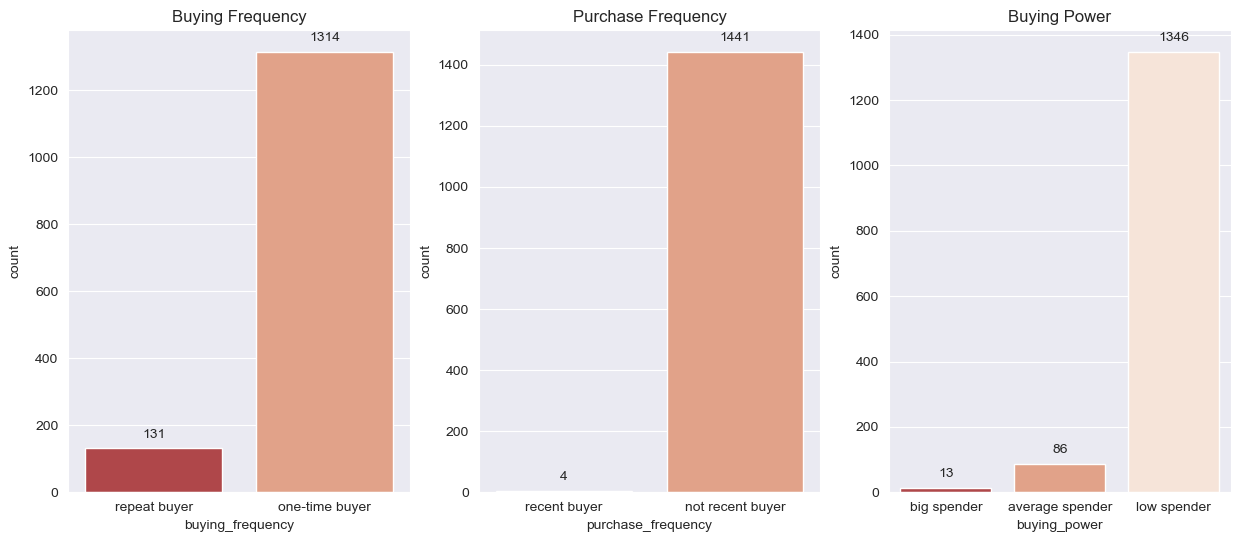

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6 ), sharey=False)

sns.countplot(x='buying_frequency', data=df, ax=ax[0])
ax[0].set_title('Buying Frequency')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.countplot(x='purchase_frequency', data=df, ax=ax[1])
ax[1].set_title('Purchase Frequency')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.countplot(x='buying_power', data=df, ax=ax[2])
ax[2].set_title('Buying Power')
for p in ax[2].patches:
    ax[2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#### Figure 1 shows the count plots of buying frequency, purchase frequency and buying power. 

#### From Figure 1, it is concluded that most customers are 
#### one time buyers who purchased items more than 100 days ago and 
#### spends less than the average spending.

## Sales analysis

### Revenue per month

#### The revenue generated from each month is calculated to determine the peak season for sales.

In [15]:
query = """

 select month(order_date)month, round(sum(oi.list_price * oi.quantity * (1-oi.discount)),0)monthly_revenue
 from imanportfolio2..orders o
 join imanportfolio2..order_items oi
 on o.order_id = oi.order_id
 group by month(order_date)
 order by sum(oi.list_price * oi.quantity * (1-oi.discount))desc
 
 """

select *
from imanportfolio2..categories c
join imanportfolio2..products p
on c.category_id= p.category_id
order by p.list_price desc

df= pd.read_sql_query(query, cnxn)
df

C:\Users\user\AppData\Local\Temp\ipykernel_15532\395561956.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(query, cnxn)


,month,monthly_revenue
0,4,1212357.0
1,1,882193.0
2,3,853503.0
3,2,669694.0
4,6,589617.0
5,9,575461.0
6,10,526188.0
7,8,524589.0
8,11,475269.0
9,5,473503.0


<Axes: xlabel='month', ylabel='monthly_revenue'>

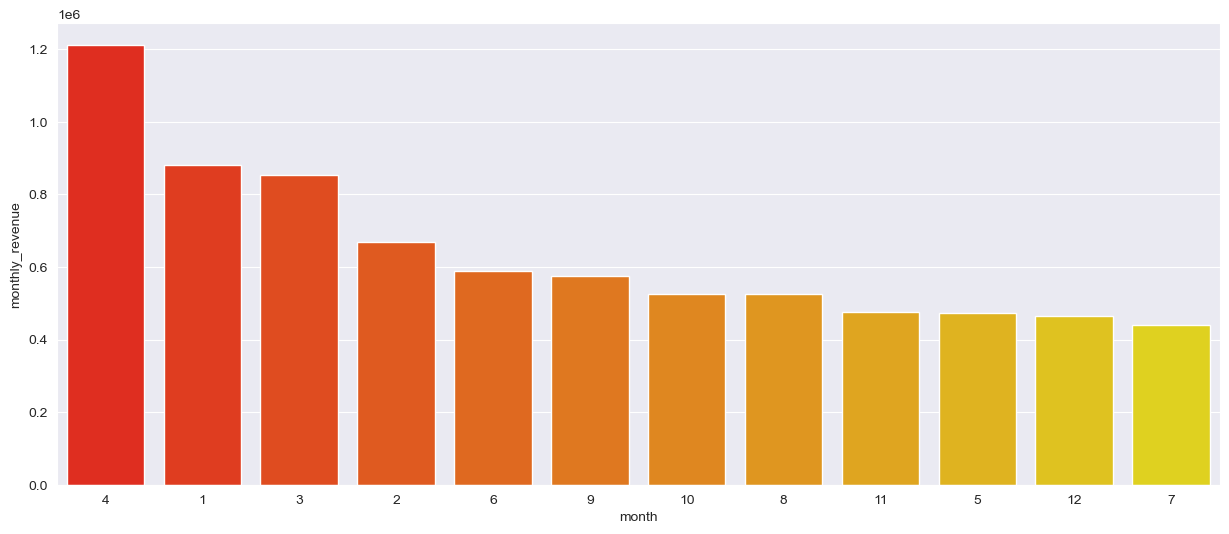

In [16]:
fig= plt.subplots(figsize=(15, 6))

sns.barplot(x='month', y="monthly_revenue", data=df, palette="autumn", 
            order=df.sort_values('monthly_revenue',ascending = False).month)

#### Figure 2 shows the monthly revenue.

#### From the figure, monthly revenue is highest during Q1 and Q2, with April as the peak season.

### Top 20 revenue-generating products 

#### The revenue generated from each product is calculated to determine the best selling products.

In [20]:
query = """

select product_name, round(rev, 0)revenue 
from (
select distinct p.product_name, 
sum(oi.list_price * oi.quantity * (1-oi.discount)) over(partition by p.product_name)rev 
from imanportfolio2..products p
join imanportfolio2..categories c
on p.category_id = c.category_id
join imanportfolio2..order_items oi
on oi.product_id= p.product_id
)subq
order by round(rev, 0) desc

"""


df = pd.read_sql_query(query, cnxn)
df


C:\Users\user\AppData\Local\Temp\ipykernel_15532\70099328.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnxn)


,product_name,revenue
0,Trek Slash 8 27.5 - 2016,555559.0
1,Trek Conduit+ - 2016,389249.0
2,Trek Fuel EX 8 29 - 2016,368473.0
3,Surly Straggler 650b - 2016,226766.0
4,Trek Domane SLR 6 Disc - 2017,211585.0
...,...,...
273,Trek Precaliber 24 7-speed Girl's - 2018,256.0
274,Electra Cruiser 1 Tall - 2016/2018,243.0
275,Trek MT 201 - 2018,225.0
276,Electra Soft Serve 1 (16-inch) - Girl's - 2018,224.0


[Text(0.5, 1.0, 'Top 20 Products')]

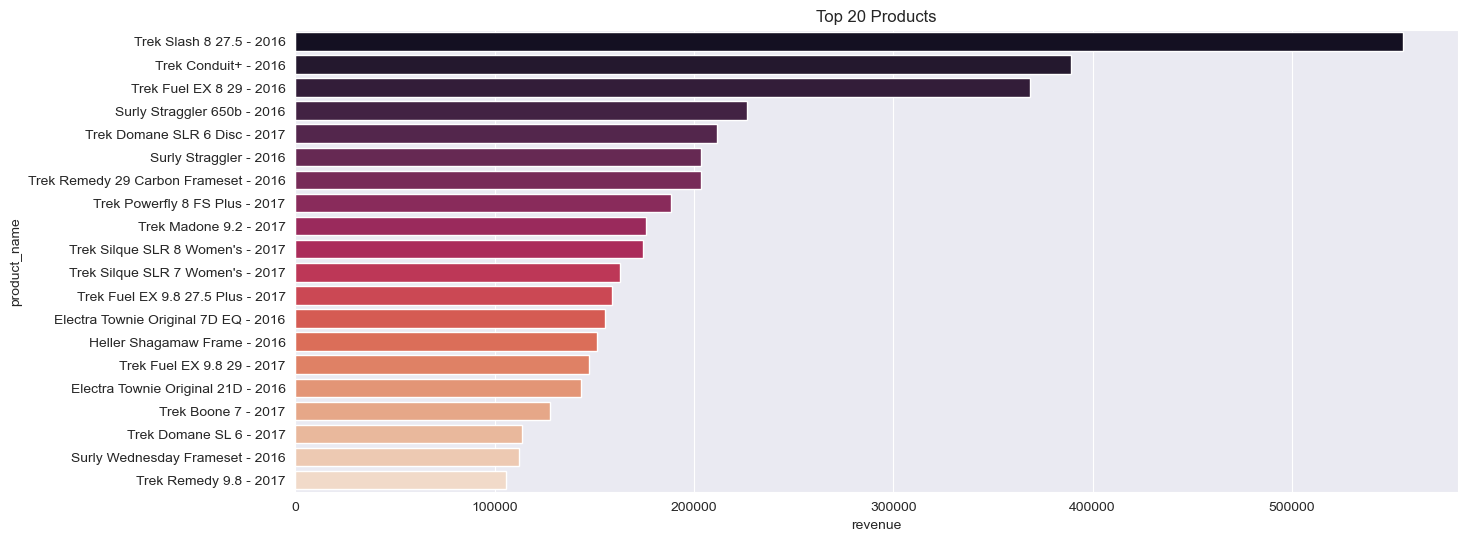

In [21]:
fig= plt.subplots(figsize=(15, 6))

sns.barplot(x='revenue', y='product_name', palette='rocket', data=df.nlargest(20, 'revenue')).set(title='Top 20 Products')



#### Figure 3 shows the revenue generated by each product.

#### From figure 3, four types of Trek bikes are in the top 5 revenue-generating products;
#### with the Surly Stranggler 650b at number 4.

### Product pairing / market basket analysis

#### Identify and pairs of products that are frequently purchased together. 
#### This helps the business identify buying patterns that could help them in pricing and marketing strategies.

In [38]:
query = """

select 
product_a, 
product_b, 
purchase_count 
from (
select 
p1.product_name as product_a, 
p2.product_name as product_b, 
count(*)purchase_count
from imanportfolio2..order_items oi1
inner join imanportfolio2..order_items oi2
on oi1.order_id = oi2.order_id and
oi1.product_id < oi2.product_id and
oi1.product_id <> oi2.product_id 
inner join imanportfolio2..products p1
on p1.product_id = oi1.product_id
inner join imanportfolio2..products p2
on p2.product_id = oi2.product_id
group by p1.product_id, p2.product_id, p1.product_name, p2.product_name) subq
where purchase_count > 10 
order by purchase_count desc

"""
#p.s remove "where purchase_count > 10" if all itemsets(total 3463) are needed.


df=pd.read_sql_query(query, cnxn)
pd.set_option('display.max_rows',None) 

df

C:\Users\user\AppData\Local\Temp\ipykernel_15532\2430864132.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query, cnxn)


,product_a,product_b,purchase_count
0,Heller Shagamaw Frame - 2016,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,15
1,Trek Conduit+ - 2016,Surly Straggler 650b - 2016,14
2,Electra Moto 1 - 2016,Electra Cruiser 1 (24-Inch) - 2016,14
3,Electra Townie Original 21D - 2016,Electra Cruiser 1 (24-Inch) - 2016,14
4,Trek Conduit+ - 2016,Surly Straggler - 2016,13
5,Pure Cycles Western 3-Speed - Women's - 2015/2016,Electra Cruiser 1 (24-Inch) - 2016,13
6,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,13
7,Pure Cycles Vine 8-Speed - 2016,Electra Townie Original 7D EQ - 2016,12
8,Surly Wednesday Frameset - 2016,Surly Ice Cream Truck Frameset - 2016,12
9,Surly Wednesday Frameset - 2016,Trek Conduit+ - 2016,12


Table 1 shows the itemsets that have a purchase count of more than 10.

#### Using the information from table 1, promotional campaigns can be strategized or product recommendations can be implemented to help customers with their purchasing decisions.

#### In conclusion, most customers from the bike shop are one time buyers. 

#### Trek bikes are the top revenue-generating products. 

#### Finally, a market basket analysis is done to identify the frequently purchased itemsets. 